In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
confirmed_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
recovered_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [3]:
confirmed_df = pd.read_csv(confirmed_cases)
print(confirmed_df.shape)
death_df = pd.read_csv(death_cases)
print(death_df.shape)
recovered_df = pd.read_csv(recovered_cases)
print(recovered_df.shape)

(280, 660)
(280, 660)
(265, 660)


In [4]:
recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/29/21', '10/30/21', '10/31/21', '11/1/21', '11/2/21', '11/3/21',
       '11/4/21', '11/5/21', '11/6/21', '11/7/21'],
      dtype='object', length=660)

In [6]:
india_confirmed = confirmed_df[confirmed_df["Country/Region"]=="India"]
india_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21
147,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,34260470,34273300,34285814,34296237,34308140,34321025,34333754,34344683,34355509,34366987


In [7]:
# Fetching all the columns from confirmed dataset
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/29/21', '10/30/21', '10/31/21', '11/1/21', '11/2/21', '11/3/21',
       '11/4/21', '11/5/21', '11/6/21', '11/7/21'],
      dtype='object', length=660)

In [34]:
# Extracting the date columns
confirmed = confirmed_df.loc[:, cols[561]:cols[657]]
deaths = death_df.loc[:, cols[561]:cols[657]]
recoveries = recovered_df.loc[:, cols[561]:cols[657]]

india = india_confirmed.loc[:, cols[561]:cols[657]]


In [35]:
confirmed

,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21
0,147501,147985,148572,148933,149361,149810,150240,150458,150778,151013,...,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392
1,133121,133146,133211,133310,133442,133591,133730,133912,133981,134201,...,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994
2,172564,173922,175229,176724,178013,179216,180356,181376,182368,183347,...,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995
3,14678,14747,14766,14797,14809,14836,14836,14836,14836,14873,...,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618
4,42815,42970,43070,43158,43269,43487,43592,43662,43747,43890,...,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,157507,157507,174461,181756,189066,193381,205656,215560,224894,232937,...,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547
276,316861,317083,317264,317404,317534,317703,317703,317999,317999,318181,...,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099
277,7070,7081,7086,7096,7104,7131,7131,7165,7187,7198,...,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843
278,196293,196490,197123,197791,198455,199135,199662,200049,200201,200830,...,209657,209672,209702,209722,209734,209739,209760,209781,209815,209852


In [36]:
deaths

,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21
0,6737,6774,6804,6836,6864,6879,6897,6908,6936,6961,...,7266,7268,7269,7272,7280,7281,7281,7284,7284,7284
1,2457,2457,2457,2457,2457,2458,2459,2459,2460,2460,...,2893,2902,2909,2916,2924,2931,2937,2940,2944,2948
2,4291,4329,4370,4404,4441,4487,4520,4550,4578,4618,...,5904,5907,5913,5918,5920,5924,5927,5931,5936,5939
3,128,128,128,128,128,128,128,128,128,129,...,130,130,130,130,130,130,130,130,130,130
4,1016,1018,1022,1026,1032,1042,1044,1049,1053,1057,...,1703,1705,1707,1708,1710,1713,1713,1716,1718,1719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1306,1306,2071,2327,2720,3016,3250,3397,3757,4145,...,21856,21910,21966,22030,22083,22131,22205,22283,22342,22412
276,3604,3609,3609,3609,3609,3611,3611,3613,3613,3615,...,4651,4657,4663,4663,4663,4681,4689,4694,4697,4705
277,1377,1378,1380,1380,1383,1384,1384,1386,1389,1391,...,1868,1874,1877,1880,1889,1890,1894,1897,1901,1905
278,3406,3412,3422,3430,3447,3459,3474,3484,3491,3499,...,3660,3660,3660,3661,3661,3661,3661,3661,3662,3662


In [37]:
recoveries

,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21
0,82586,82586,82586,82586,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,130243,130256,130291,130314,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,116009,116770,117557,118409,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14210,14296,14348,14380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37397,38360,39389,39582,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,43157,43157,50831,54332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,311918,312149,312289,312320,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,4200,4212,4232,4251,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,188106,188950,189341,189658,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
india

,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21
147,31695958,31726507,31769132,31812114,31856757,31895385,31934455,31969954,31998158,32036511,...,34231809,34246157,34260470,34273300,34285814,34296237,34308140,34321025,34333754,34344683


In [39]:
dates = confirmed.keys()
india_dates = india.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
india_cases = []


In [40]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)

In [41]:
for i in india_dates:
    india_sum = india[i].sum()
    india_cases.append(india_sum)

In [42]:
india_cases

[31695958,
 31726507,
 31769132,
 31812114,
 31856757,
 31895385,
 31934455,
 31969954,
 31998158,
 32036511,
 32077706,
 32117826,
 32156493,
 32192576,
 32225513,
 32250679,
 32285857,
 32322258,
 32358829,
 32393286,
 32424234,
 32449306,
 32474773,
 32512366,
 32558530,
 32603188,
 32649947,
 32695030,
 32737939,
 32768880,
 32810845,
 32857937,
 32903289,
 32945907,
 32988673,
 33027621,
 33058843,
 33096718,
 33139981,
 33174954,
 33208330,
 33236921,
 33264175,
 33289579,
 33316755,
 33347325,
 33381728,
 33417390,
 33448163,
 33478419,
 33504534,
 33531498,
 33563421,
 33594803,
 33624419,
 33652745,
 33678786,
 33697581,
 33716451,
 33739980,
 33766707,
 33791061,
 33813903,
 33834702,
 33853048,
 33871881,
 33894312,
 33915569,
 33935309,
 33953475,
 33971607,
 33985920,
 34001743,
 34020730,
 34037592,
 34053573,
 34067719,
 34081315,
 34094373,
 34108996,
 34127450,
 34143236,
 34159562,
 34175468,
 34189774,
 34202202,
 34215653,
 34231809,
 34246157,
 34260470,
 34273300,

In [43]:
world_cases

[198434106,
 199012754,
 199649768,
 200325452,
 201014208,
 201835855,
 202386565,
 202826858,
 203482291,
 204130791,
 204859176,
 205569844,
 206375564,
 206909039,
 207372782,
 208052162,
 208734667,
 209463021,
 210178558,
 210968682,
 211508324,
 211954443,
 212659611,
 213346175,
 214076869,
 214812596,
 215557778,
 216104524,
 216550902,
 217238217,
 217856980,
 218583978,
 219261762,
 219979041,
 220467951,
 220895088,
 221332677,
 222069718,
 222700506,
 223337706,
 223971168,
 224422653,
 224786892,
 225396857,
 225946794,
 226515216,
 227091131,
 227683566,
 228216675,
 228574219,
 229115078,
 229583836,
 230121421,
 230632591,
 231179715,
 231542631,
 231888750,
 232366478,
 232815262,
 233317294,
 233801545,
 234340399,
 234681749,
 234987253,
 235437081,
 235855740,
 236368274,
 236800043,
 237273901,
 237602874,
 237915747,
 238300846,
 238733890,
 239196757,
 239640318,
 240097346,
 240429368,
 240742629,
 241160809,
 241601744,
 242071153,
 242527826,
 243012378,
 243

In [44]:
days_since_5_1 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
india_cases = np.array(india_cases).reshape(-1, 1)

In [45]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [46]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [47]:
start = '8/1/2021'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [48]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_5_1, world_cases, test_size=0.25, shuffle=False) 

In [49]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [50]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 95070.38866792202
MSE: 12182571634.954641


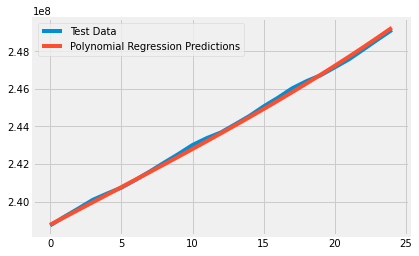

In [51]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [52]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=20)
    plt.xlabel('Days Since 5/1/2021', size=20)
    plt.ylabel('Number of Cases', size=20)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

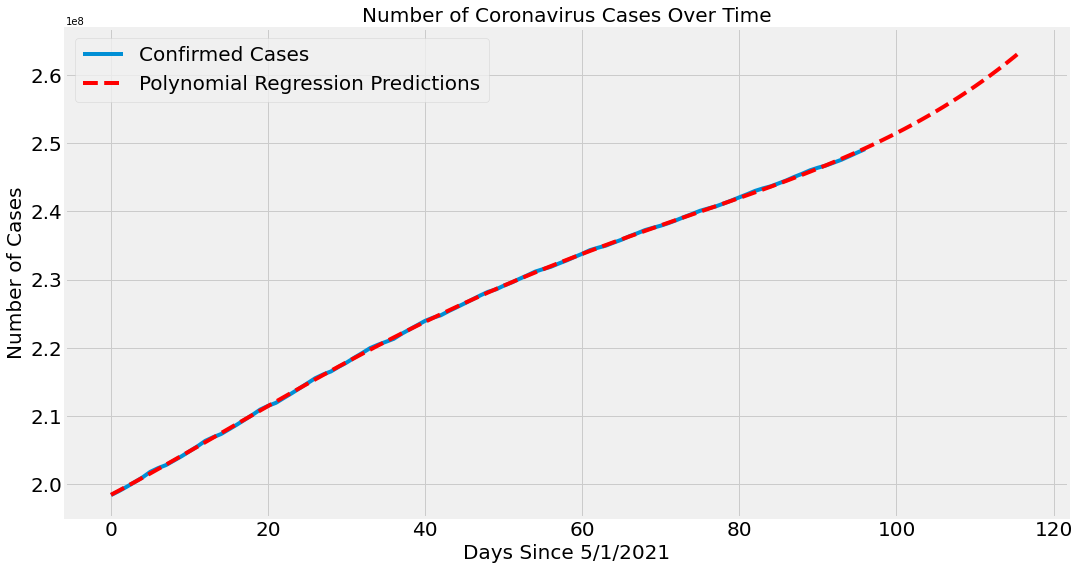

In [53]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

In [54]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,11/06/2021,249789941.0
1,11/07/2021,250340434.0
2,11/08/2021,250905699.0
3,11/09/2021,251486544.0
4,11/10/2021,252083794.0
5,11/11/2021,252698288.0
6,11/12/2021,253330881.0
7,11/13/2021,253982441.0
8,11/14/2021,254653852.0
9,11/15/2021,255346014.0


In [55]:
regressor = LinearRegression()
regressor.fit(poly_X_train_confirmed , y_train_confirmed)
r2_score = regressor.score(poly_X_train_confirmed , y_train_confirmed)
print(r2_score*100,'%')

99.99364486004546 %


In [56]:
regressor = LinearRegression()
regressor.fit(X_test_confirmed, y_test_confirmed)
r2_score = regressor.score(X_test_confirmed, y_test_confirmed)
print(r2_score*100,'%')

99.92329627807231 %


In [57]:
X_india_train_confirmed, X_india_test_confirmed, y_india_train_confirmed, y_india_test_confirmed = train_test_split(days_since_5_1, india_cases , test_size=0.25, shuffle=False) 

In [58]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=2)
poly_X_train_confirmed = poly.fit_transform(X_india_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_india_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [59]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_india_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_india_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_india_test_confirmed))

MAE: 125105.53735393078
MSE: 17166162147.180567


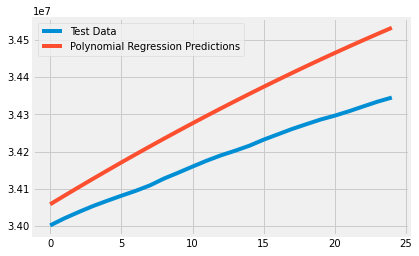

In [60]:
plt.plot(y_india_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [61]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Confirmed cases in India Over Time', size=20)
    plt.xlabel('Days Since 5/1/2021', size=20)
    plt.ylabel('Number of Cases', size=20)
    plt.legend(['Deaths ', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

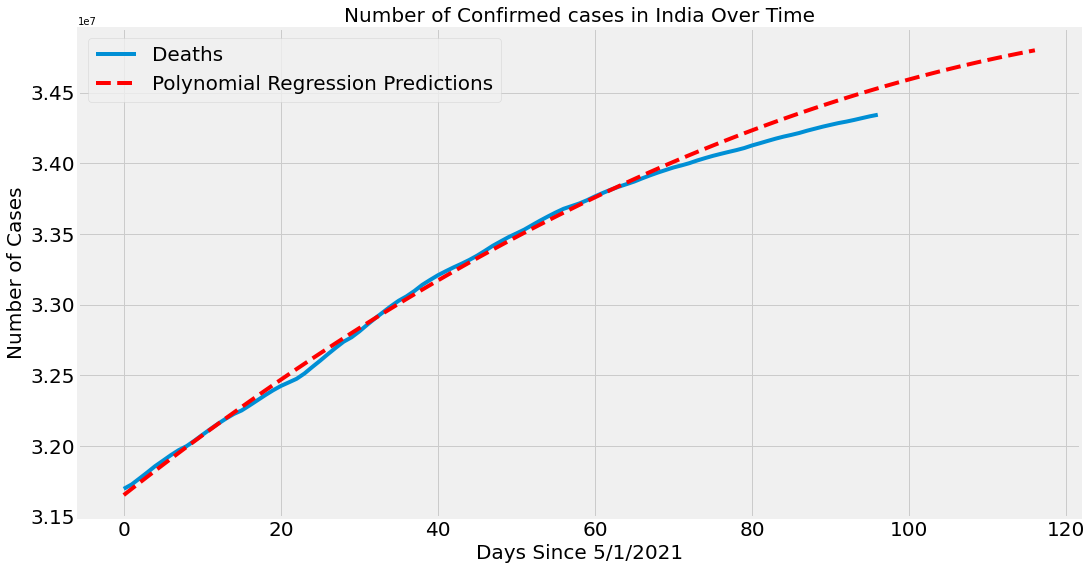

In [62]:
plot_predictions(adjusted_dates, india_cases , linear_pred, 'Polynomial Regression Predictions', 'red')

In [63]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-30:], 'Predicted cases in India': np.round(linear_pred[-30:])})
poly_df

,Date,Predicted cases in India
0,10/27/2021,34373665.0
1,10/28/2021,34392397.0
2,10/29/2021,34410845.0
3,10/30/2021,34429007.0
4,10/31/2021,34446884.0
5,11/01/2021,34464475.0
6,11/02/2021,34481781.0
7,11/03/2021,34498802.0
8,11/04/2021,34515537.0
9,11/05/2021,34531988.0
